# RockSpoon

## Variables

| Column |	Description |
|:-------|:-------------|
| name | The name of the company. |
| active_founder | Number of active founders in the startup. |
|batch | The Y Combinator batch the company participated in. |
|founded | The year the company was founded. |
|industry | The industry or sector of the company. |
|jobs | Number of available jobs in a company. |
|location | The primary location of the company. |
|logo | URL or path to the company's logo image. |
|long_description |	A detailed description of the company. |
|region	| The region where the company operates or is headquartered. |
|short_description | A brief description of the company. |
|status | The current status of the company (e.g., active, acquired, closed). |
|tags | Keywords or tags related to the company's focus or technology. |
|team_size | The current team size of the company. |
|website | The company's official website. |

## Questions:

1. What is the most invested industry by year of foundation? (Nice to have a graph)

2. What is the top 10 cities that contains the highest amount of founded companies?

3. "What are the 10 (or close to 10) most successful (status equal Public or Acquired) industries and quantity? 

4. What is the average team size of those companies?"

5. What are the most unsuccessful (status equal Archived) industries?

6. If you would pick an industry to invest, what industry would be and why? 

7. If you would pick a Company to invest, what Company would be and why? 


### Requirement
- Slide presentation with no more than 5 slides
- Excel with all calculations done and formulas used

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import streamlit as st

In [3]:
df = pd.read_excel("data.xlsx", sheet_name="Data")
print(df.info())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4974 entries, 0 to 4973
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   active_founders    4940 non-null   object 
 1   batch              4974 non-null   object 
 2   founded            3899 non-null   float64
 3   industry           4974 non-null   object 
 4   jobs               4974 non-null   int64  
 5   location           4599 non-null   object 
 6   logo               4272 non-null   object 
 7   long_description   4625 non-null   object 
 8   name               4974 non-null   object 
 9   region             4684 non-null   object 
 10  short_description  4775 non-null   object 
 11  status             4974 non-null   object 
 12  tags               4218 non-null   object 
 13  team_size          4893 non-null   float64
 14  website            4973 non-null   object 
dtypes: float64(2), int64(1), object(12)
memory usage: 583.0+ KB
None
       

In [12]:
# 1. What is the most invested industry by year of foundation? (Nice to have a graph)

industry_by_year = df.groupby(['founded', 'industry']).size().reset_index(name="count")
industry_top = industry_by_year.sort_values(["founded", "count"], ascending=[True, False])
print(industry_top)

     founded                                   industry  count
0     2005.0                                        B2B      1
1     2005.0                              B2B,Marketing      1
2     2005.0                           B2B,Productivity      1
3     2005.0                                Industrials      1
5     2006.0                           Consumer,Content      3
..       ...                                        ...    ...
686   2024.0                     Healthcare,Diagnostics      1
687   2024.0     Healthcare,Drug Discovery and Delivery      1
696   2024.0                         Industrials,Energy      1
698   2024.0               Real Estate and Construction      1
699   2024.0  Real Estate and Construction,Construction      1

[701 rows x 3 columns]


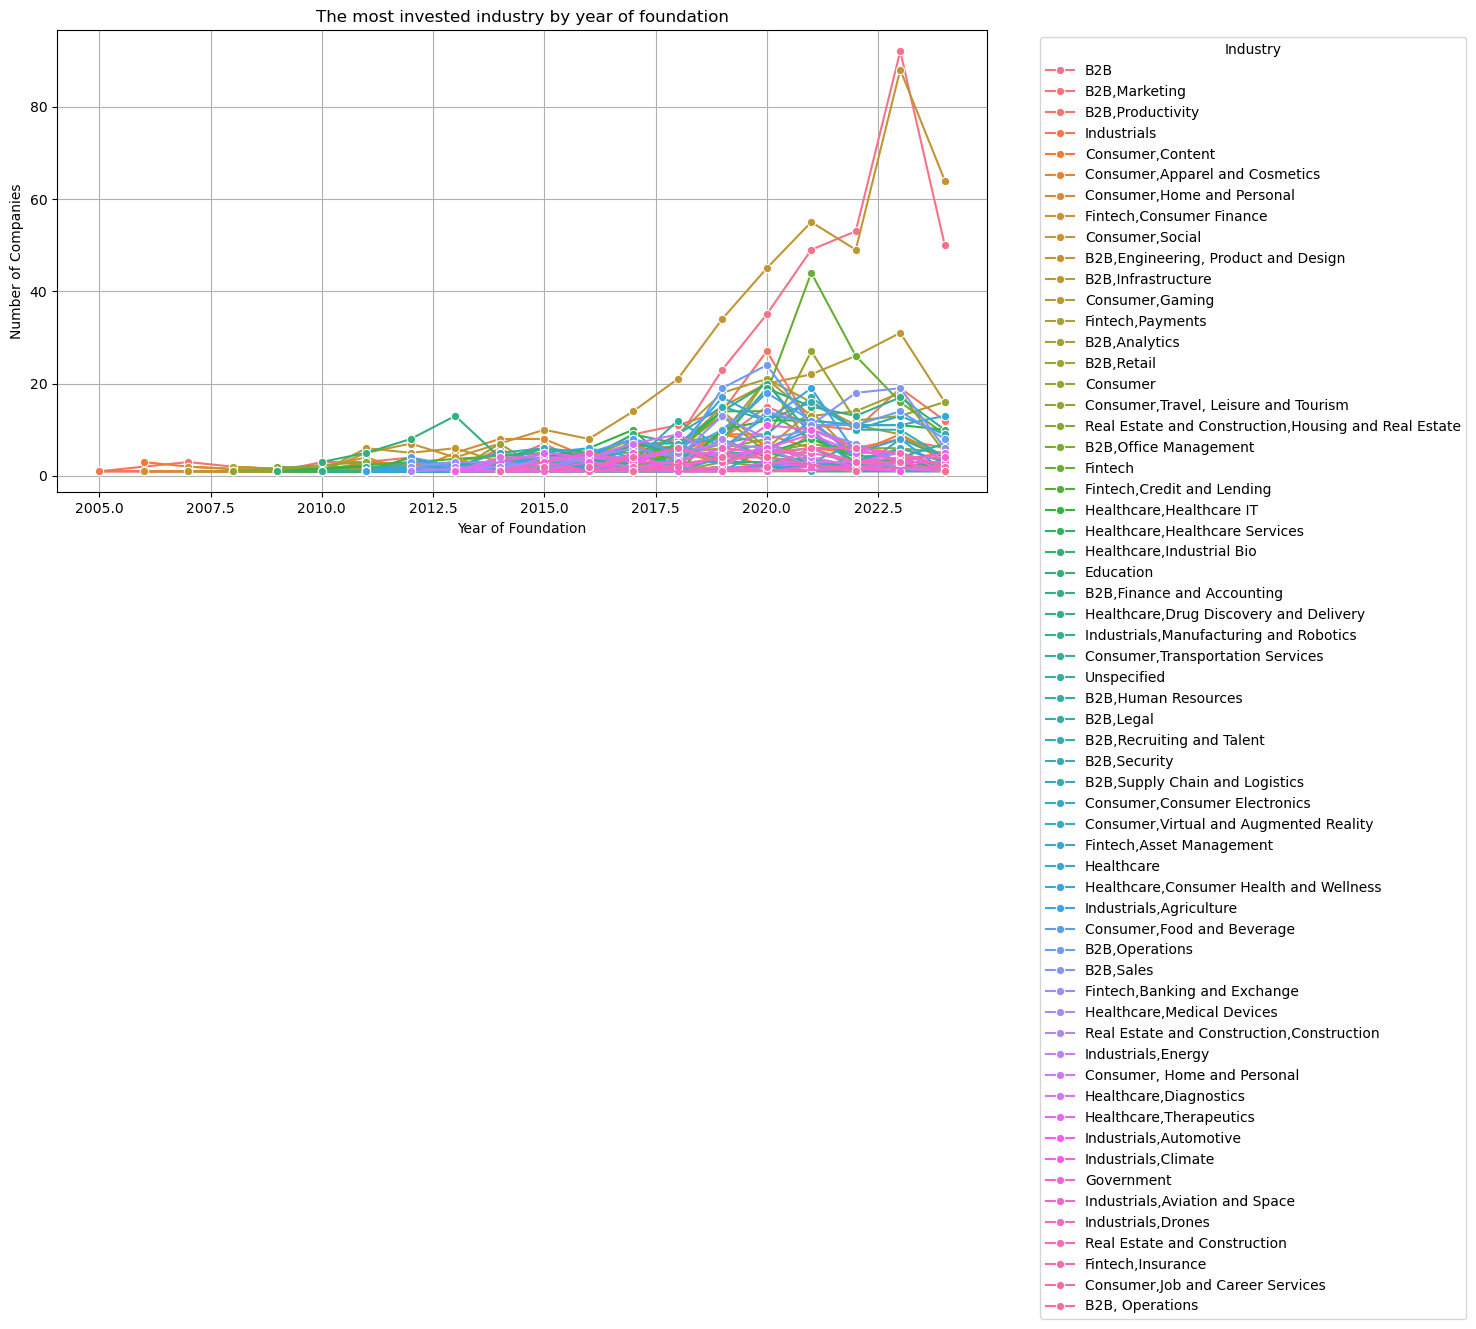

In [13]:
# Graph

plt.figure(figsize=(12, 6))
sns.lineplot(data=industry_top, x="founded", y="count", hue="industry", marker="o")

plt.xlabel("Year of Foundation")
plt.ylabel("Number of Companies")
plt.title("The most invested industry by year of foundation")
plt.legend(title="Industry", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)

plt.show()

In [14]:
# 2. What is the top 10 cities that contains the highest amount of founded companies?

top_cities = df["location"].value_counts().head(10)
print(top_cities)

location
San Francisco             1671
New York                   452
London, United Kingdom     130
Bengaluru, India           114
Los Angeles, CA            111
Palo Alto                  103
Mountain View               87
Toronto, Canada             76
Paris, France               58
Boston                      58
Name: count, dtype: int64


In [15]:
# 3. "What are the 10 (or close to 10) most successful (status equal Public or Acquired) industries and quantity? 

successful_companies = df[df["status"].isin(["Public", "Acquired"])]
successful_industries = successful_companies["industry"].value_counts().head(10)
print(successful_industries)

industry
B2B,Engineering, Product and Design    64
B2B,Infrastructure                     36
B2B,Productivity                       35
Consumer,Home and Personal             29
B2B,Marketing                          28
Consumer,Content                       25
Consumer,Social                        23
Education                              21
B2B,Retail                             20
B2B,Analytics                          18
Name: count, dtype: int64


In [17]:
# 4. What is the average team size of those companies?"

average_team_size = successful_companies["team_size"].describe()
print(average_team_size)

count     603.000000
mean      104.001658
std       574.257537
min         0.000000
25%         3.000000
50%        11.000000
75%        38.500000
max      8600.000000
Name: team_size, dtype: float64


In [19]:
# 5. What are the most unsuccessful (status equal Archived) industries?

unsuccessful_industries = df[df["status"] == "Archived"]["industry"].value_counts()
print(unsuccessful_industries)

Series([], Name: count, dtype: int64)


In [ ]:
# 6. If you would pick an industry to invest, what industry would be and why? 

In [ ]:
# 7. If you would pick a Company to invest, what Company would be and why? 